# Scalability test

### ``Experimental Study of Machine-Learning-Based Detection and Identification of Physical-Layer Attacks in Optical Networks``

Results shown in Sec. V.D of the paper.

Here, we generate a number of samples using the scikit-learn make_classification function.

The execution of this code does not require the original dataset, and therefore can be reproduced by anyone in your own machine.

*__Attention:__* The code below may require a lot of computing resources (both CPU and RAM) and may take a lot of time. The file `models/results-scalability.h5` provides the results of this code running over a Core i9 9900X with 64 GB of RAM.

In [48]:
import time
import pickle

import joblib
from keras.models import load_model
from sklearn.datasets import make_classification

%matplotlib inline
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

color_cycler = cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
marker_cycler = cycler(marker=['s', 'o', 'x', '+', '*', 'v', '^', '<', '>', '1'])
rcParams['axes.prop_cycle'] = color_cycler + marker_cycler

In [44]:
prefix = 'full_dataset'
names = [
            "ANN",
             "kNN",
             "SVM",
             "GP",
             "DT",
             "RF",
             "NB",
             "QDA"
             ]
with open('./models/scaler.h5', 'rb') as f: # save scaler to use for the generation of new samples
    scaler = pickle.load(f)

In [45]:
time_spent = {}
time_checks = [100, 1000, 5000, 10000, 50000, 100000, 500000, 1000000] # number of samples to be generated

clfs = {}
for idc, name in enumerate(names):
    time_spent[name] = []
    # loading the trained classifiers from folder
    if name == 'ANN':
        clfs[name] = load_model('models/' + prefix + '_' + name + '.h5')
    else:
        clfs[name] = joblib.load('models/' + prefix + '_' + name + '.joblib')

for num_samples in time_checks:
    print('Number of samples:', num_samples)
    # generates samples using the same scaler that was used to normalize the features
    data, y = make_classification(n_samples=num_samples, n_features=len(scaler.scale_), n_classes=7, scale=scaler.scale_, n_informative=10)
    for idc, name in enumerate(names):
        start_time = time.time_ns()
        clfs[name].predict(np.array(data))
        elapsed_time = (time.time_ns() - start_time)
        time_spent[name].append(elapsed_time)
        print('\tclassifier: ', name, '\t', elapsed_time, 'ns')
    del data, y # clear the memory

Number of samples: 100
	classifier:  ANN 	 242059355 ns
	classifier:  kNN 	 4751089 ns
	classifier:  SVM 	 1742876 ns
	classifier:  GP 	 466076853 ns
	classifier:  DT 	 561149 ns
	classifier:  RF 	 1193903 ns
	classifier:  NB 	 637456 ns
	classifier:  QDA 	 735123 ns
Number of samples: 1000
	classifier:  ANN 	 17427947 ns
	classifier:  kNN 	 49863316 ns
	classifier:  SVM 	 12681107 ns
	classifier:  GP 	 631589920 ns
	classifier:  DT 	 709789 ns
	classifier:  RF 	 1937020 ns
	classifier:  NB 	 1450332 ns
	classifier:  QDA 	 2024593 ns
Number of samples: 5000
	classifier:  ANN 	 114957959 ns
	classifier:  kNN 	 237542593 ns
	classifier:  SVM 	 62508827 ns
	classifier:  GP 	 2552119511 ns
	classifier:  DT 	 871869 ns
	classifier:  RF 	 4049768 ns
	classifier:  NB 	 3922456 ns
	classifier:  QDA 	 6008899 ns
Number of samples: 10000
	classifier:  ANN 	 241208368 ns
	classifier:  kNN 	 404461415 ns
	classifier:  SVM 	 124786779 ns
	classifier:  GP 	 4696158630 ns
	classifier:  DT 	 1114239 n

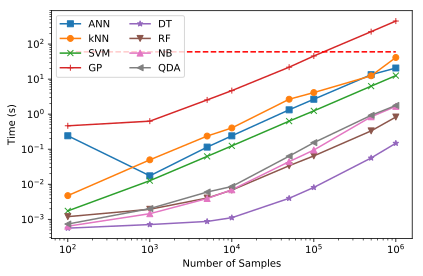

In [51]:
with open('models/results_scalability.h5', 'wb') as f:
    pickle.dump(time_spent, f)

plt.figure()
for idc, name in enumerate(names):
    plt.semilogy(time_checks, np.array(time_spent[name]) / 1e9, label=names[idc])
plt.semilogy(time_checks, [60 for i in time_checks], color='red', linestyle='--', marker='')
plt.gca().set_xscale('log')
plt.legend(loc=2, ncol=2)
plt.xlabel('Number of Samples')
plt.ylabel('Time (s)')
plt.tight_layout()
plt.savefig('figures/11-scalability.pdf')
plt.show()
plt.close()